# Exploring Python Fast F1
*For full documentation on Fast F1, see https://theoehrly.github.io/Fast-F1/*

In [13]:
import fastf1 as ff1
ff1.Cache.enable_cache('cache')  
race = ff1.get_session(2021, 'Monaco', 'R')
laps = race.load_laps(with_telemetry=True)
fastest_lap = laps.pick_fastest()
fastest_lap

core           INFO 	Loading laps for Monaco Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['31', '10', '33', '22', '14', '4', '18', '55', '63', '9', '16', '7', '3', '6', '47', '77', '11', '5', '99', '44']


Time                      0 days 02:01:41.201000
DriverNumber                                  44
LapTime                   0 days 00:01:12.909000
LapNumber                                   69.0
Stint                                        3.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:19.179000
Sector2Time               0 days 00:00:34.041000
Sector3Time               0 days 00:00:19.689000
Sector1SessionTime        0 days 02:00:47.471000
Sector2SessionTime        0 days 02:01:21.512000
Sector3SessionTime        0 days 02:01:41.201000
SpeedI1                                    217.0
SpeedI2                                    200.0
SpeedFL                                    259.0
SpeedST                                    278.0
Compound                                    SOFT
TyreLife                                     6.0
FreshTyre                                  False
LapStartTime        

In [14]:
pos_data = fastest_lap.get_pos_data()
pos_data

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2021-05-23 14:30:29.198,OnTrack,-7663,-6589,502,pos,0 days 00:00:00.143000,0 days 02:00:28.435000
1,2021-05-23 14:30:29.418,OnTrack,-7673,-6429,503,pos,0 days 00:00:00.363000,0 days 02:00:28.655000
2,2021-05-23 14:30:29.638,OnTrack,-7681,-6269,503,pos,0 days 00:00:00.583000,0 days 02:00:28.875000
3,2021-05-23 14:30:29.858,OnTrack,-7675,-6108,503,pos,0 days 00:00:00.803000,0 days 02:00:29.095000
4,2021-05-23 14:30:30.078,OnTrack,-7665,-5948,503,pos,0 days 00:00:01.023000,0 days 02:00:29.315000
...,...,...,...,...,...,...,...,...
327,2021-05-23 14:31:40.918,OnTrack,-7577,-7444,503,pos,0 days 00:01:11.863000,0 days 02:01:40.155000
328,2021-05-23 14:31:41.138,OnTrack,-7603,-7293,503,pos,0 days 00:01:12.083000,0 days 02:01:40.375000
329,2021-05-23 14:31:41.358,OnTrack,-7622,-7138,503,pos,0 days 00:01:12.303000,0 days 02:01:40.595000
330,2021-05-23 14:31:41.578,OnTrack,-7637,-6981,502,pos,0 days 00:01:12.523000,0 days 02:01:40.815000


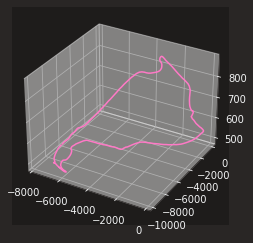

In [16]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(pos_data["X"], pos_data["Y"], pos_data["Z"])